## 1. **Data Preprocessing**

### Install preprocessor and num2words packages

In [1]:
!pip install preprocessor

In [2]:
!pip install num2words

In [3]:
!pip install detect_language

ERROR: Could not find a version that satisfies the requirement detect_language (from versions: none)
ERROR: No matching distribution found for detect_language


### Import Packages and Load Dataset

In [4]:
import pandas as pd
import re
import numpy as np
import preprocessor as p
from num2words import num2words

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
from textblob import Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
df = pd.read_csv('WELFake_Dataset.csv')
df = df[['title', 'text', 'label']]
df.head(5)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

As the table above displays, our dataset has only 3 columns: title, text, and label. The title and text were extracted from articles. For label, 1 means real and 0 means fake news.

### Drop Null Values

In [10]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

Since we have nearly 600 null values out of more than 70000 insatnces, we decided to drop all the rows contain null. <br>
Additionally, since some of the rows contained a blank space, we first converted the blank space to a null value to be dropped as well. 

In [11]:
def blank_to_nan(df_w_column):
    temp = []
    for item in df_w_column:
        if item == '':
            temp.append(np.nan)
        else:
            temp.append(item)
    return temp

In [12]:
title = blank_to_nan(df['title'])
text = blank_to_nan(df['text'])

In [13]:
a = pd.DataFrame({'title':title, 'text':text, 'label':df['label']})

In [14]:
df = a.dropna()

### Data Preprocessing

#### Remove Symbols

Firstly, we defined the function ```remove_symbols``` to remove all unnecessary characters.

* In the ```remove_symbols``` function, we transform all title and text into lower case. 
* The function also removes punctuation since they does not give any extra information. 
* Another thing our ```remove_symbols``` function handles is the stop words (or commonly occurring words). ```stopwords``` are English words that don't add much to a sentence's meaning. Therefore, they can be safely ignored without affecting the sentence's meaning.

In [15]:
!pip install language-detector
!pip install Unidecode

In [16]:
from nltk.corpus import stopwords
from language_detector import detect_language

import string 
import unidecode
stop = stopwords.words('english')
stop.append('io')

def clean_up(text):
    square_brackets = re.sub('\[[^]]*\]', '', text)
    no_url = re.sub(r'http\S+', '', square_brackets)
    no_punctuation = re.sub(r'[^\w\s]', ' ', no_url)
    no_pictures = re.sub('pic.+', '', no_punctuation)
    no_characters = re.sub('[а-яА-Я][\u4e00-\u9fff]', '', no_pictures)
    the_unicode = unidecode.unidecode(no_characters)
    stripped_white_space = the_unicode.strip()
    return stripped_white_space

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    cleaned_text = clean_up(text)
    no_stopwords = remove_stopwords(cleaned_text)
    return no_stopwords.lower()

# Apply function on review column
df['text'] = df['text'].apply(denoise_text)
df['title'] = df['title'].apply(denoise_text)

C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/504024994.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(denoise_text)
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/504024994.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(denoise_text)


In [17]:
# Removing all rows with these words, since the rows with these words are different languages
df = df[~df.text.str.contains('que')]
df = df[~df.text.str.contains('kontroliruemyi')]
df = df[~df.text.str.contains('obshchestvom')]

In [18]:
# Removing any blank rows created from the previous step 
df['title'] = blank_to_nan(df['title'])
df['text'] = blank_to_nan(df['text'])

In [19]:
# Dropping any new na values
new_df = df.dropna()

df['title'] = blank_to_nan(df['title'])
df['text'] = blank_to_nan(df['text'])

In [20]:
new_df.head()

title  \
0  law enforcement high alert following threats c...   
2  unbelievable obama attorney general says charl...   
4  satan 2 russia unvelis image terrifying new su...   
5  time christian group sues amazon splc designat...   
6  dr ben carson targeted irs never audit spoke n...   

                                                text  label  
0  comment expected barack obama members fyf911 f...      1  
2  demonstrators gathered last night exercising c...      1  
4  rs 28 sarmat missile dubbed satan 2 replace ss...      1  
5  say one time someone sued southern poverty law...      1  
6     dr ben carson tells story happened spoke obama      1

#### Lemmatization

Next, we will use stemming to turn the term into its root word rather by their removing suffices (stemming method). To find the root word, it uses the lexicon and does a morphological analysis.

In [21]:
# Update title and text columns with the lemmatized versions of the original title and text columns
new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3870072181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3870072181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [22]:
new_df.head()

title  \
0  law enforcement high alert following threat co...   
2  unbelievable obama attorney general say charlo...   
4  satan 2 russia unvelis image terrifying new su...   
5  time christian group sue amazon splc designati...   
6  dr ben carson targeted irs never audit spoke n...   

                                                text  label  
0  comment expected barack obama member fyf911 fu...      1  
2  demonstrator gathered last night exercising co...      1  
4  r 28 sarmat missile dubbed satan 2 replace s 1...      1  
5  say one time someone sued southern poverty law...      1  
6      dr ben carson tell story happened spoke obama      1

#### Tokenize String

Beside cleaning the text in our dataset, we also add two more columns to store the title and text after tokenlization.  

In [23]:
def tokenize(the_list):
    token_list = []
    for item in the_list:
        token_list.append(TextBlob(item).words)
    return token_list

In [24]:
new_df['title_token'] = tokenize([str(x) for x in new_df['title']])
new_df['text_token'] = tokenize([str(x) for x in new_df['text']])

C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3512436877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_token'] = tokenize([str(x) for x in new_df['title']])
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3512436877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_token'] = tokenize([str(x) for x in new_df['text']])


In [25]:
new_df[['label', 'title_token', 'text_token']].head()

label                                        title_token  \
0      1  [law, enforcement, high, alert, following, thr...   
2      1  [unbelievable, obama, attorney, general, say, ...   
4      1  [satan, 2, russia, unvelis, image, terrifying,...   
5      1  [time, christian, group, sue, amazon, splc, de...   
6      1  [dr, ben, carson, targeted, irs, never, audit,...   

                                          text_token  
0  [comment, expected, barack, obama, member, fyf...  
2  [demonstrator, gathered, last, night, exercisi...  
4  [r, 28, sarmat, missile, dubbed, satan, 2, rep...  
5  [say, one, time, someone, sued, southern, pove...  
6  [dr, ben, carson, tell, story, happened, spoke...

#### Sentiment Analysis

Next, we also use sentiment analysis to detect the sentiment of the ```text``` and ```title``` in our dataser. It then returns a tuple representing polarity and subjectivity of each, where value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment.

In [26]:
# Function to return polarity
def polarity(the_list):
    pol_list = []
    for item in the_list:
        pol_list.append(TextBlob(item).sentiment[0])
    return pol_list

In [27]:
# Function to return subjectivity
def subjectivity(the_list):
    sub_list = []
    for item in the_list:
        sub_list.append(TextBlob(item).sentiment[1])
    return sub_list

In [28]:
# Create columns of polarity and subjectivity for both title and text
new_df['title_polarity'] = polarity([str(x) for x in new_df['title']])
new_df['title_subjectivity'] = subjectivity([str(x) for x in new_df['title']])
new_df['text_polarity'] = polarity([str(x) for x in new_df['text']])
new_df['text_subjectivity'] = subjectivity([str(x) for x in new_df['text']])

C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/206595182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_polarity'] = polarity([str(x) for x in new_df['title']])
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/206595182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_subjectivity'] = subjectivity([str(x) for x in new_df['title']])
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/206595182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [29]:
new_df[['label', 'title_polarity', 'title_subjectivity', 'text_polarity', 'text_subjectivity']].head(5)

label  title_polarity  title_subjectivity  text_polarity  text_subjectivity
0      1        0.053333            0.213333       0.013333            0.30750
2      1        0.016667            0.666667       0.178571            0.36746
4      1       -0.287879            0.484848       0.100000            0.80500
5      1       -0.400000            0.450000      -0.094931            0.38894
6      1        0.000000            0.000000       0.000000            0.00000

#### Basic Features Extraction

After preprocessing our dataset, we added to our dataset some basic features  for both title and text, including: word count, character count, average word length, and the number of numeric characters.

In [30]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [31]:
new_df['word_count_title'] = new_df['title'].apply(lambda x: len(str(x).split(" ")))
new_df['char_count_title'] = new_df['title'].str.len() # this also includes spaces
new_df['avg_word_title'] = new_df['title'].apply(lambda x: avg_word(x) if len(x) != 0 else 0)
new_df['numerics_title'] = new_df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

new_df['word_count_text'] = new_df['text'].apply(lambda x: len(str(x).split(" ")))
new_df['char_count_text'] = new_df['text'].str.len() 
new_df['avg_word_text'] = new_df['text'].apply(lambda x: avg_word(x) if len(x) != 0 else 0)
new_df['numerics_text'] = new_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3523775176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word_count_title'] = new_df['title'].apply(lambda x: len(str(x).split(" ")))
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3523775176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['char_count_title'] = new_df['title'].str.len() # this also includes spaces
C:\Users\sarah\AppData\Local\Temp/ipykernel_12660/3523775176.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [32]:
new_df.head(5)

title  \
0  law enforcement high alert following threat co...   
2  unbelievable obama attorney general say charlo...   
4  satan 2 russia unvelis image terrifying new su...   
5  time christian group sue amazon splc designati...   
6  dr ben carson targeted irs never audit spoke n...   

                                                text  label  \
0  comment expected barack obama member fyf911 fu...      1   
2  demonstrator gathered last night exercising co...      1   
4  r 28 sarmat missile dubbed satan 2 replace s 1...      1   
5  say one time someone sued southern poverty law...      1   
6      dr ben carson tell story happened spoke obama      1   

                                         title_token  \
0  [law, enforcement, high, alert, following, thr...   
2  [unbelievable, obama, attorney, general, say, ...   
4  [satan, 2, russia, unvelis, image, terrifying,...   
5  [time, christian, group, sue, amazon, splc, de...   
6  [dr, ben, carson, targeted, irs, never, audit,...   

                                          text_token  title_polarity  \
0  [comment, expected, barack, obama, member, fyf...        0.053333   
2  [demonstrator, gathered, last, night, exercisi...        0.016667   
4  [r, 28, sarmat, missile, dubbed, satan, 2, rep...       -0.287879   
5  [say, one, time, someone, sued, southern, pove...       -0.400000   
6  [dr, ben, carson, tell, story, happened, spoke...        0.000000   

   title_subjectivity  text_polarity  text_subjectivity  word_count_title  \
0            0.213333       0.013333            0.30750                13   
2            0.666667       0.178571            0.36746                13   
4            0.484848       0.100000            0.80500                12   
5            0.450000      -0.094931            0.38894                 9   
6            0.000000       0.000000            0.00000                11   

   char_count_title  avg_word_title  numerics_title  word_count_text  \
0                94        6.307692               1              261   
2               101        6.846154               0               21   
4                79        5.666667               1               55   
5                59        5.666667               0              144   
6                70        5.454545               0                8   

   char_count_text  avg_word_text  numerics_text  
0             1598       5.126437              6  
2              159       6.619048              0  
4              324       4.909091             12  
5             1074       6.465278              0  
6               45       4.750000              0

#### Term Frequency – Inverse Document Frequency (TF-IDF)

For the TF-IDF, we did the following: <br>


*   Created two separate transposed dataframes of both the title and text columns
*   Then we created dictionaries for the number of times a word appeared in the text or in the title
*   Next we converted the dataframe column containing the word count to a list
*   Then we ran a for loop to run through both title and text dictionaries, and calculated the TF, the IDF, and the TF-IDF
*   After this we showed the words with the highest TF-IDF
*   Lastly, we showed the plots for the TF-IDF for the titles and the text of each article



In [33]:
import math

In [34]:
real_df = new_df[new_df['label']==1]
fake_df = new_df[new_df['label']==0]

In [35]:
real_title_norm_t = real_df[['title']].T
real_text_norm_t = real_df[['text']].T
fake_title_norm_t = fake_df[['title']].T
fake_text_norm_t = fake_df[['text']].T

In [36]:
def the_words(transposed_df):
    the_list = []
    for (columnName, columnData) in transposed_df.iteritems():
        temp = []
        for x in columnData:
            for i in x.split():
                temp.append(i)
            the_list.append(temp)
    return the_list

In [37]:
def the_dict(words):
    x = 1
    the_dictionary = {}
    for item in words:
        temp = {}
        for i in item:
            if i in temp:
                temp[i] = temp[i] + 1
            else:
                temp[i] = 1
        the_dictionary[x] = temp
        x += 1
    return the_dictionary

In [38]:
real_title_words = the_words(real_title_norm_t) 
real_text_words = the_words(real_text_norm_t)
fake_title_words = the_words(fake_title_norm_t) 
fake_text_words = the_words(fake_text_norm_t)

real_title_tf_dict = the_dict(real_title_words)
real_text_tf_dict = the_dict(real_text_words)
fake_title_tf_dict = the_dict(fake_title_words)
fake_text_tf_dict = the_dict(fake_text_words)

In [39]:
real_title_len_word = real_df['word_count_title'].tolist()
real_text_len_word = real_df['word_count_text'].tolist()
fake_title_len_word = fake_df['word_count_title'].tolist()
fake_text_len_word = fake_df['word_count_text'].tolist()

In [40]:
def tfidf_functions(the_dictionary, length_of_words):
    x = 0
    list_of_words = []
    tf = []
    idf = []
    tfidf = []
    for i in the_dictionary:
        for j in the_dictionary[i].keys():
            tf_instance = (the_dictionary[i][j]/length_of_words[i-1])
            idf_instance = math.log(((1 + length_of_words[i-1])/(1 + tf_instance))+1)
            tfidf_instance = tf_instance * idf_instance
            tf.append(tf_instance)
            idf.append(idf_instance)
            tfidf.append(tfidf_instance)
            x += 1
            list_of_words.append(j)
    return list_of_words, tf, idf, tfidf

In [41]:
real_text_the_words, real_text_tf, real_text_idf, real_text_tfidf = tfidf_functions(real_text_tf_dict, real_text_len_word)
real_title_the_words, real_title_tf, real_title_idf, real_title_tfidf = tfidf_functions(real_title_tf_dict, real_title_len_word)

fake_text_the_words, fake_text_tf, fake_text_idf, fake_text_tfidf = tfidf_functions(fake_text_tf_dict, fake_text_len_word)
fake_title_the_words, fake_title_tf, fake_title_idf, fake_title_tfidf = tfidf_functions(fake_title_tf_dict, fake_title_len_word)

In [42]:
real_title_df = pd.DataFrame({'word':real_title_the_words, 'tf':real_title_tf, 'idf':real_title_idf, 'tfidf':real_title_tfidf})
real_text_df = pd.DataFrame({'word':real_text_the_words, 'tf':real_text_tf, 'idf':real_text_idf, 'tfidf':real_text_tfidf})

fake_title_df = pd.DataFrame({'word':fake_title_the_words, 'tf':fake_title_tf, 'idf':fake_title_idf, 'tfidf':fake_title_tfidf})
fake_text_df = pd.DataFrame({'word':fake_text_the_words, 'tf':fake_text_tf, 'idf':fake_text_idf, 'tfidf':fake_text_tfidf})

In [43]:
real_tfidf_title_df = real_title_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)
real_tfidf_text_df = real_text_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)

fake_tfidf_title_df = fake_title_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)
fake_tfidf_text_df = fake_text_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)

In [44]:
real_tfidf_title_df.drop_duplicates(subset=['word'],keep='first',inplace=True)
real_tfidf_text_df.drop_duplicates(subset=['word'],keep='first',inplace=True)

fake_tfidf_title_df.drop_duplicates(subset=['word'],keep='first',inplace=True)
fake_tfidf_text_df.drop_duplicates(subset=['word'],keep='first',inplace=True)

In [45]:
real_tfidf_title_df

word     tfidf
37827          dollar  1.099106
172743           vote  1.098612
180283          print  0.934887
102035            war  0.815850
157474     conspiracy  0.815850
...               ...       ...
151032        burling  0.089552
151036          lanny  0.089552
151037         breuer  0.089552
151039       chertoff  0.089552
125658  nationalistic  0.082366

[16809 rows x 2 columns]

In [46]:
real_tfidf_text_df

word     tfidf
2737123       county  1.865523
1727405            l  1.275005
573531          case  1.238759
2531805            0  1.097267
402406             1  1.047971
...              ...       ...
814722   zeynabiyyon  0.002700
814340        chubin  0.002700
813472          1681  0.002700
813480          aram  0.002700
813481       mirzaei  0.002700

[101655 rows x 2 columns]

In [47]:
fake_tfidf_title_df

word     tfidf
158367      really  0.919902
186071         win  0.808744
101299        life  0.757855
159970    politics  0.757855
8863          feed  0.733169
...            ...       ...
153013      nugent  0.170022
156801      rahman  0.170022
156800       abdel  0.170022
77975   propublica  0.170022
134130  expediting  0.163580

[14774 rows x 2 columns]

In [48]:
fake_tfidf_text_df

word     tfidf
2863054         nov  0.816472
2057652        olym  0.693147
1438489      reader  0.693147
1238114          ty  0.693147
131145     microsco  0.693147
...             ...       ...
2251404  coldebella  0.003445
2251402       kolbe  0.003445
2251379   blackwill  0.003445
2251412  falkenrath  0.003445
2251415      myriah  0.003445

[70862 rows x 2 columns]

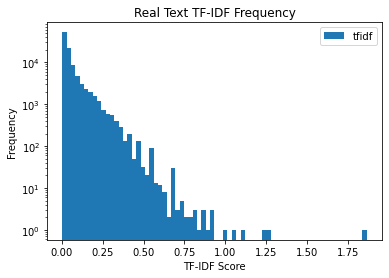

In [49]:
plot = real_tfidf_text_df.plot.hist(bins = 70, title = 'Real Text TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

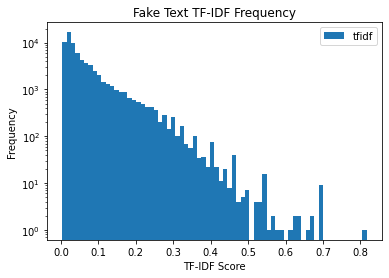

In [50]:
plot = fake_tfidf_text_df.plot.hist(bins = 70, title = 'Fake Text TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

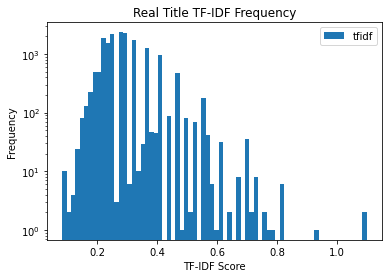

In [51]:
plot = real_tfidf_title_df.plot.hist(bins = 70, title = 'Real Title TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

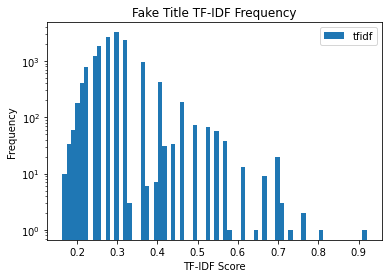

In [52]:
plot = fake_tfidf_title_df.plot.hist(bins = 70, title = 'Fake Title TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

In [53]:
import matplotlib.pyplot as plt

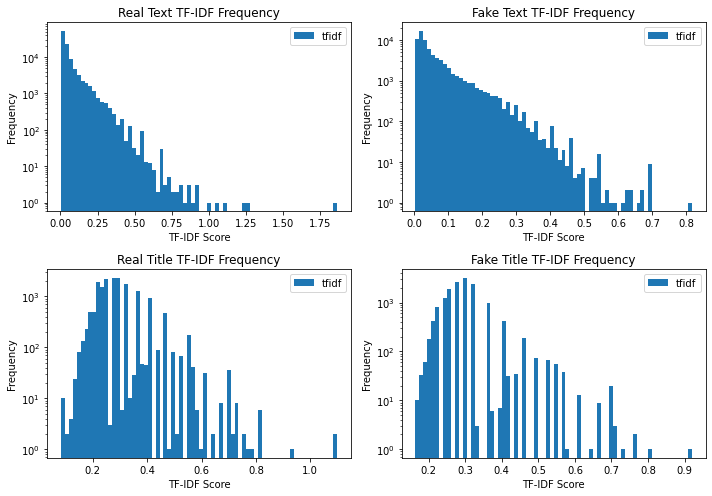

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))
plot1 = real_tfidf_text_df.plot.hist(bins = 70, title = 'Real Text TF-IDF Frequency', ax = ax1)
plot1.set_xlabel('TF-IDF Score')
plot1.set_ylabel('Frequency')
plot1.set_yscale('log')

plot2 = fake_tfidf_text_df.plot.hist(bins = 70, title = 'Fake Text TF-IDF Frequency', ax = ax2)
plot2.set_xlabel('TF-IDF Score')
plot2.set_ylabel('Frequency')
plot2.set_yscale('log')

plot3 = real_tfidf_title_df.plot.hist(bins = 70, title = 'Real Title TF-IDF Frequency', ax = ax3)
plot3.set_xlabel('TF-IDF Score')
plot3.set_ylabel('Frequency')
plot3.set_yscale('log')

plot4 = fake_tfidf_title_df.plot.hist(bins = 70, title = 'Fake Title TF-IDF Frequency', ax = ax4)
plot4.set_xlabel('TF-IDF Score')
plot4.set_ylabel('Frequency')
plot4.set_yscale('log')

plt.tight_layout()

#### Data Dictionary and Discuss Data Formatting

In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48390 entries, 0 to 72131
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               48390 non-null  object 
 1   text                48390 non-null  object 
 2   label               48390 non-null  int64  
 3   title_token         48390 non-null  object 
 4   text_token          48390 non-null  object 
 5   title_polarity      48390 non-null  float64
 6   title_subjectivity  48390 non-null  float64
 7   text_polarity       48390 non-null  float64
 8   text_subjectivity   48390 non-null  float64
 9   word_count_title    48390 non-null  int64  
 10  char_count_title    48390 non-null  int64  
 11  avg_word_title      48390 non-null  float64
 12  numerics_title      48390 non-null  int64  
 13  word_count_text     48390 non-null  int64  
 14  char_count_text     48390 non-null  int64  
 15  avg_word_text       48390 non-null  float64
 16  nume

In the new dataset we obtained after pre-processing, we have label is in form of integer, which is 0 and 1. The title and text attributes are object type. From text and title, we obtained two attributes as the tokenization of them, which are stored in form of list of single word. We also created four different basic features, which are word count, character count, average word length, and the number of numeric characters of title and text. 

## 2. **Exploratory Data Analysis** EDA

### Data Summary

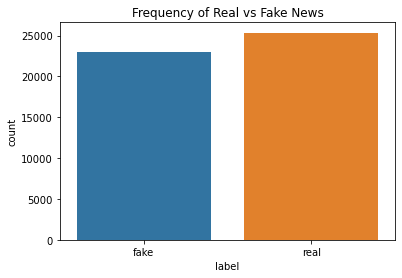

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.countplot(x = new_df['label'])
a.set_xticklabels(['fake', 'real'])
a.set_title('Frequency of Real vs Fake News');

In [57]:
length = len(new_df)
percent_real = len(new_df[new_df['label']==1])/length*100
percent_fake = len(new_df[new_df['label']==0])/length*100
print(f'There are {length} articles. \n{percent_real:.2f}% are real articles and {percent_fake:.2f}% are fake articles.')

There are 48390 articles. 
52.40% are real articles and 47.60% are fake articles.


### Number of Words/Characters/Numerics

In [58]:
real_df = new_df[new_df['label']==1]
fake_df = new_df[new_df['label']==0]

Frequency of words/characters (especially in title) has larger difference, and thus could have predictive properties

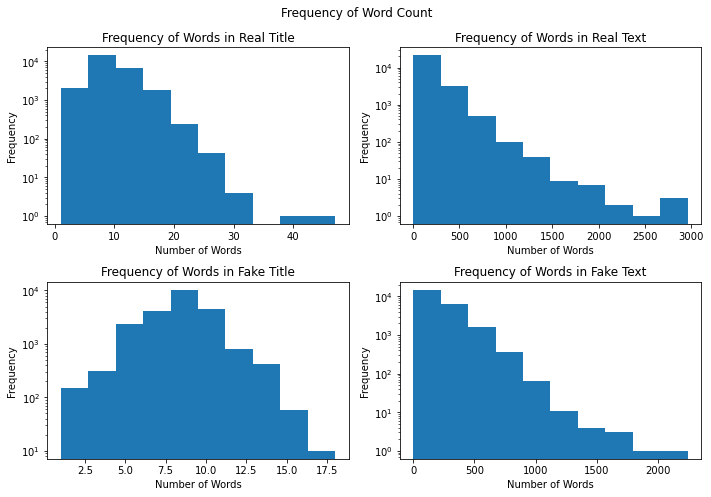

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Word Count')

ax1.hist(real_df['word_count_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Words in Real Title')

ax2.hist(real_df['word_count_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Words in Real Text')

ax3.hist(fake_df['word_count_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Number of Words')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Words in Fake Title')

ax4.hist(fake_df['word_count_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Number of Words')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Words in Fake Text')
plt.tight_layout()

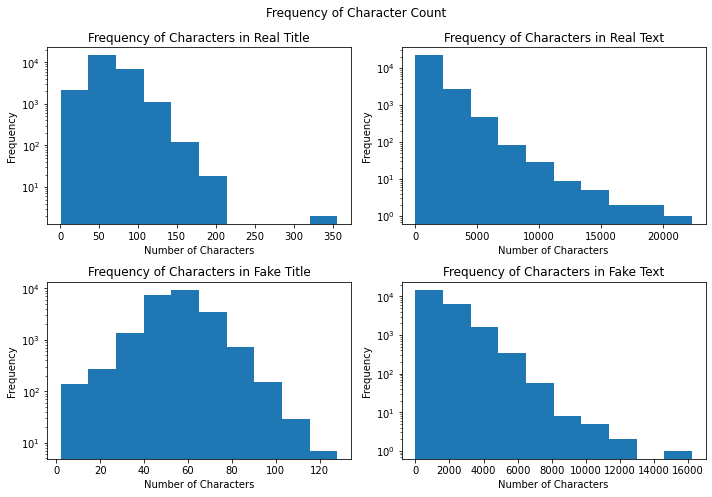

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Character Count')

ax1.hist(real_df['char_count_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Characters in Real Title')

ax2.hist(real_df['char_count_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Characters in Real Text')

ax3.hist(fake_df['char_count_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Number of Characters')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Characters in Fake Title')

ax4.hist(fake_df['char_count_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Number of Characters')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Characters in Fake Text')
plt.tight_layout()

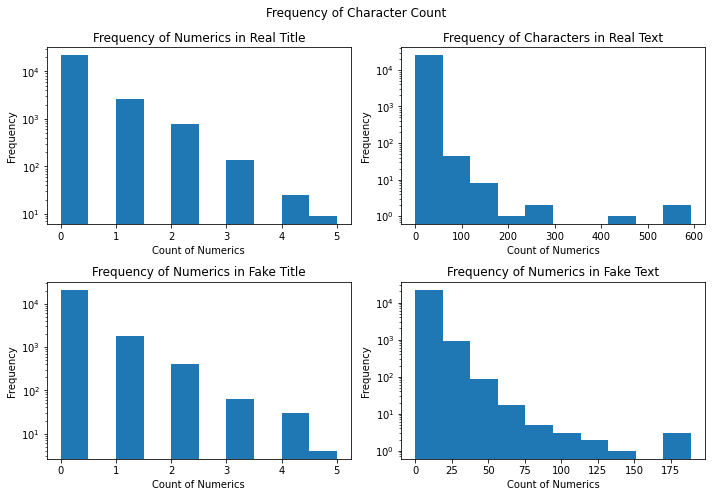

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Character Count')

ax1.hist(real_df['numerics_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Count of Numerics')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Numerics in Real Title')

ax2.hist(real_df['numerics_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Count of Numerics')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Characters in Real Text')

ax3.hist(fake_df['numerics_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Count of Numerics')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Numerics in Fake Title')

ax4.hist(fake_df['numerics_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Count of Numerics')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Numerics in Fake Text')
plt.tight_layout()

### Wordcloud

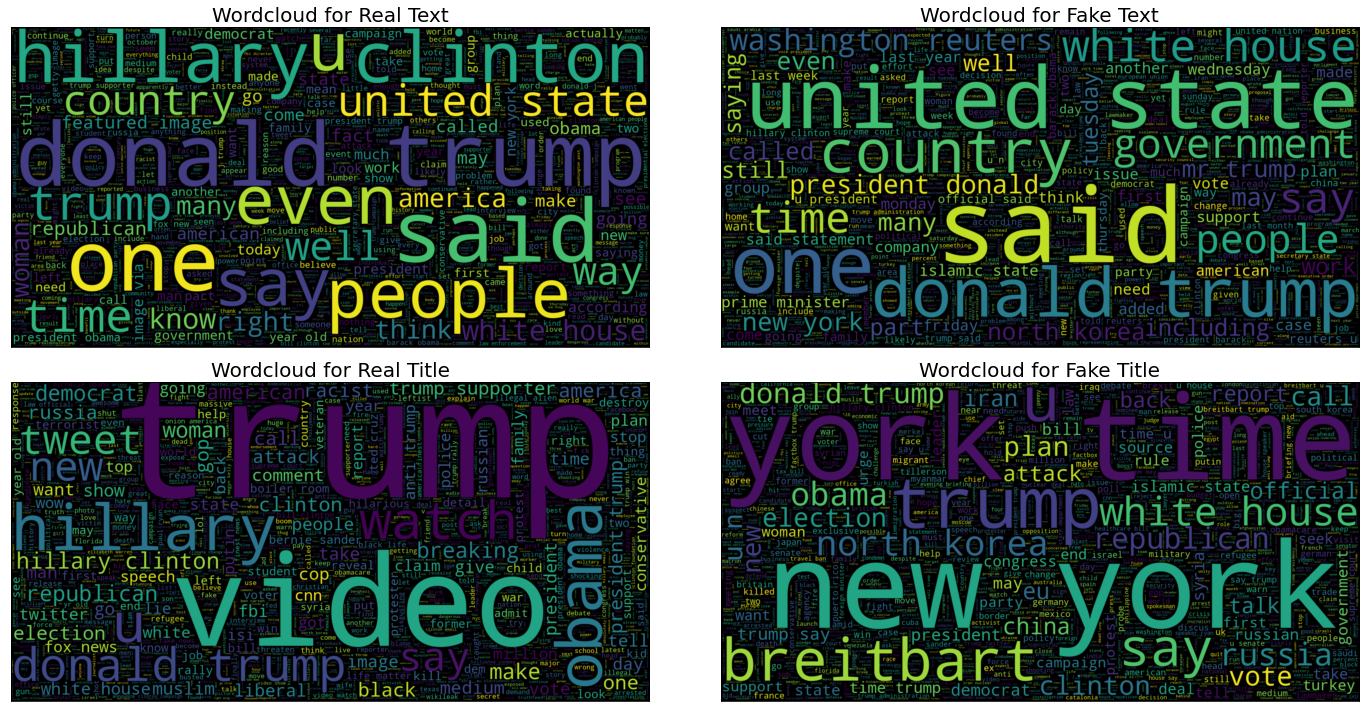

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['text']))
ax1.imshow(wc, interpolation = 'bilinear')
ax1.set_xticks([], [])
ax1.set_yticks([], [])
ax1.set_title('Wordcloud for Real Text', fontsize = 20)
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['text']))
ax2.imshow(wc, interpolation = 'bilinear')
ax2.set_xticks([], [])
ax2.set_yticks([], [])
ax2.set_title('Wordcloud for Fake Text', fontsize = 20)
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['title']))
ax3.imshow(wc, interpolation = 'bilinear')
ax3.set_xticks([], [])
ax3.set_yticks([], [])
ax3.set_title('Wordcloud for Real Title', fontsize = 20)
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['title']))
ax4.imshow(wc, interpolation = 'bilinear')
ax4.set_xticks([], [])
ax4.set_yticks([], [])
ax4.set_title('Wordcloud for Fake Title', fontsize = 20)
plt.tight_layout()

#### Real Text

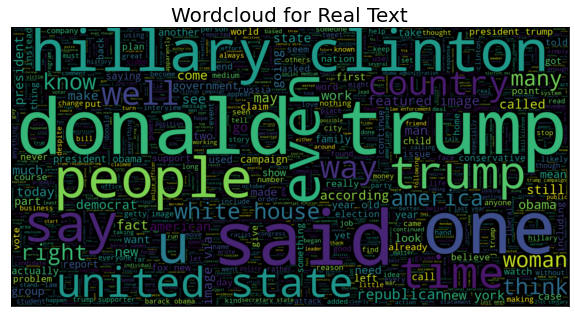

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['text']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Real Text', fontsize = 20);

#### Fake Text

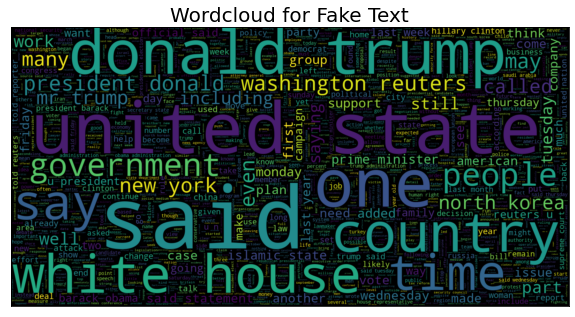

In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['text']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Fake Text', fontsize = 20);

#### Real Title

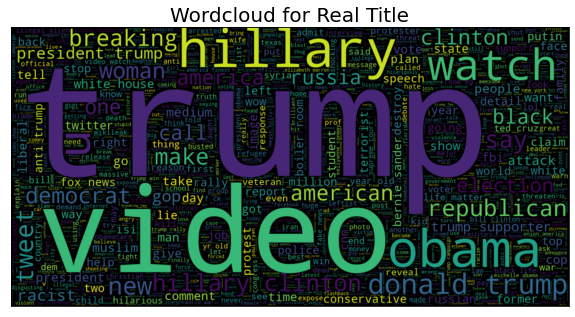

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['title']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Real Title', fontsize = 20);

#### Fake Title

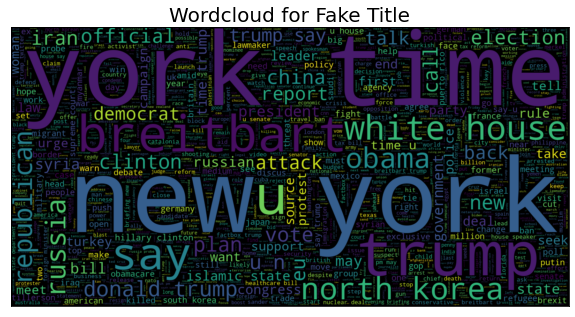

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['title']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Fake Title', fontsize = 20);

### Ngrams Analysis

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Binary Analysis

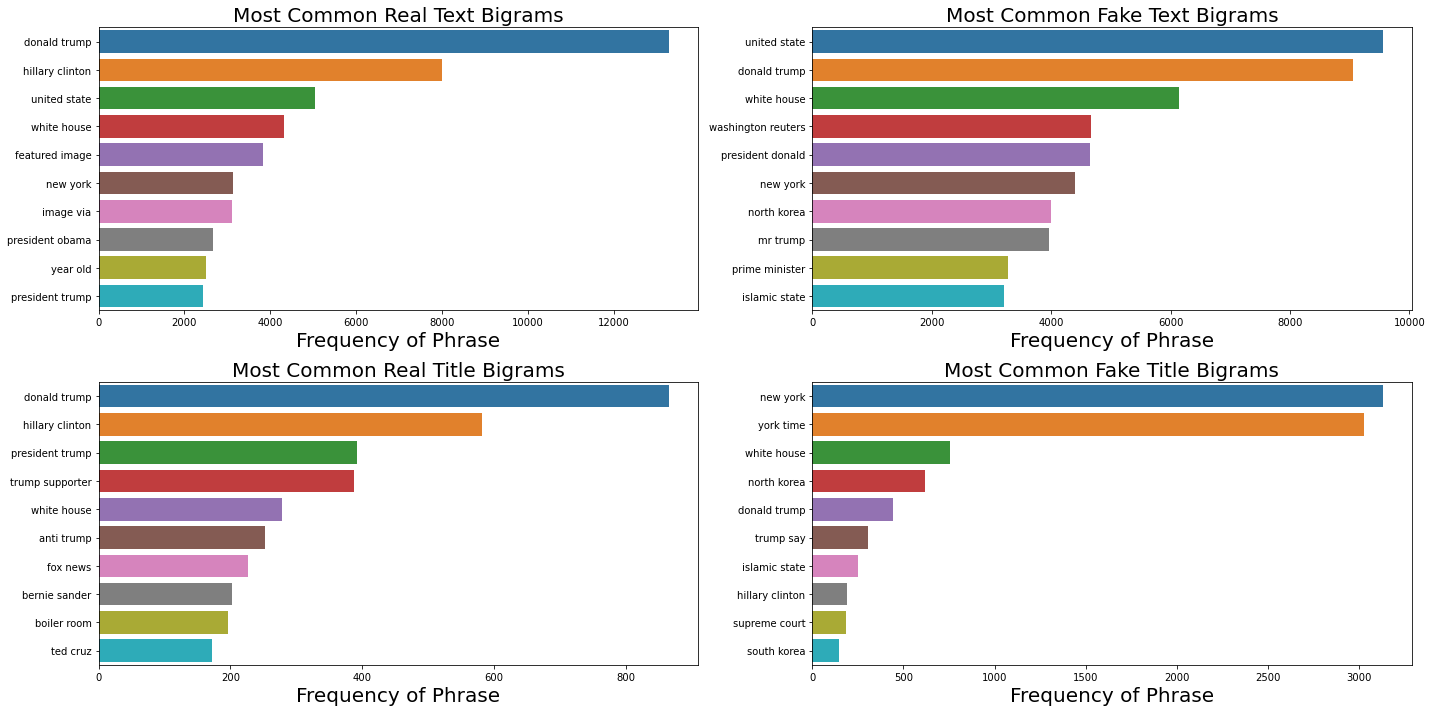

In [75]:
import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))
most_common_bi = get_top_text_ngrams(real_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax = ax1)
ax1.set_xlabel('Frequency of Phrase', fontsize = 20)
ax1.set_title('Most Common Real Text Bigrams', fontsize = 20)

most_common_bi = get_top_text_ngrams(fake_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax = ax2)
ax2.set_xlabel('Frequency of Phrase', fontsize = 20)
ax2.set_title('Most Common Fake Text Bigrams', fontsize = 20)

most_common_bi = get_top_text_ngrams(real_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax = ax3)
ax3.set_xlabel('Frequency of Phrase', fontsize = 20)
ax3.set_title('Most Common Real Title Bigrams', fontsize = 20)

most_common_bi = get_top_text_ngrams(fake_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax = ax4)
ax4.set_xlabel('Frequency of Phrase', fontsize = 20)
ax4.set_title('Most Common Fake Title Bigrams', fontsize = 20)

plt.tight_layout()

Real Text

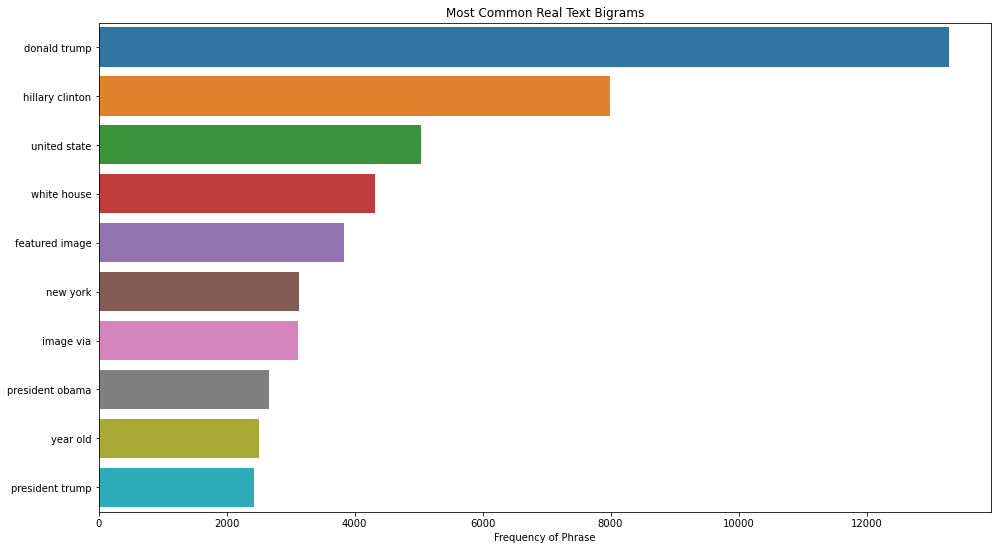

In [68]:
import seaborn as sns
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(real_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Text Bigrams');

Fake Text

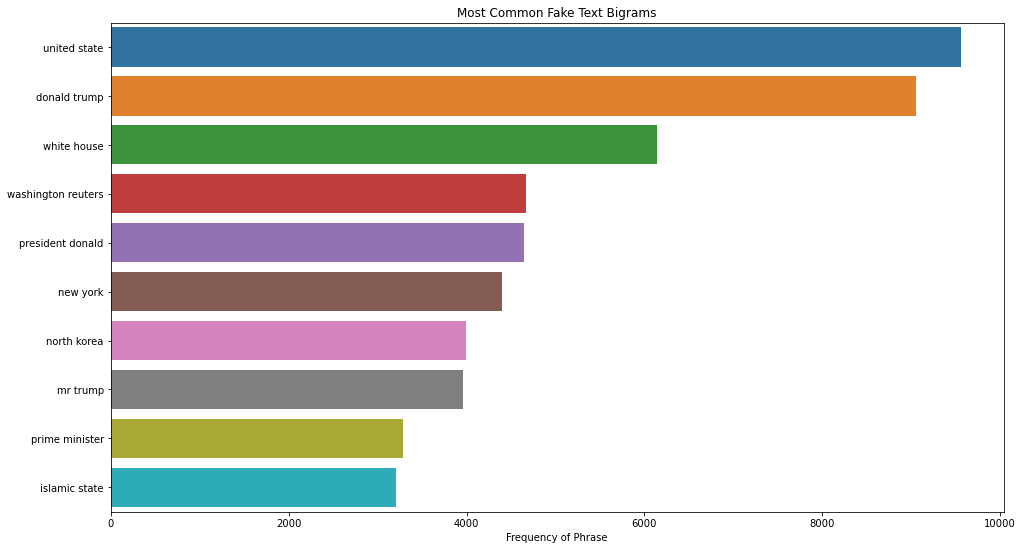

In [69]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(fake_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Text Bigrams');

Real Title 

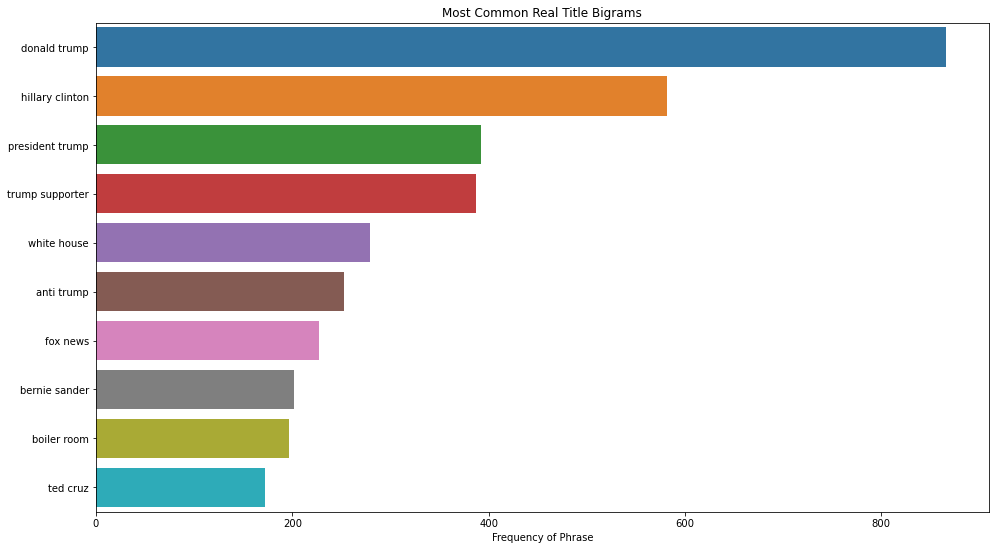

In [70]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(real_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Title Bigrams');

Fake Title

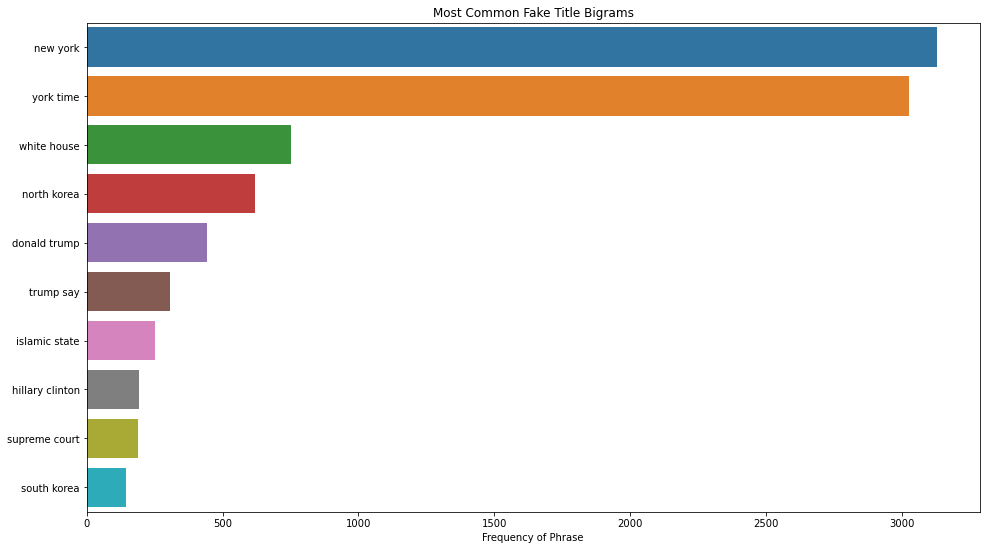

In [71]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(fake_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Title Bigrams');

#### Trigram Analysis

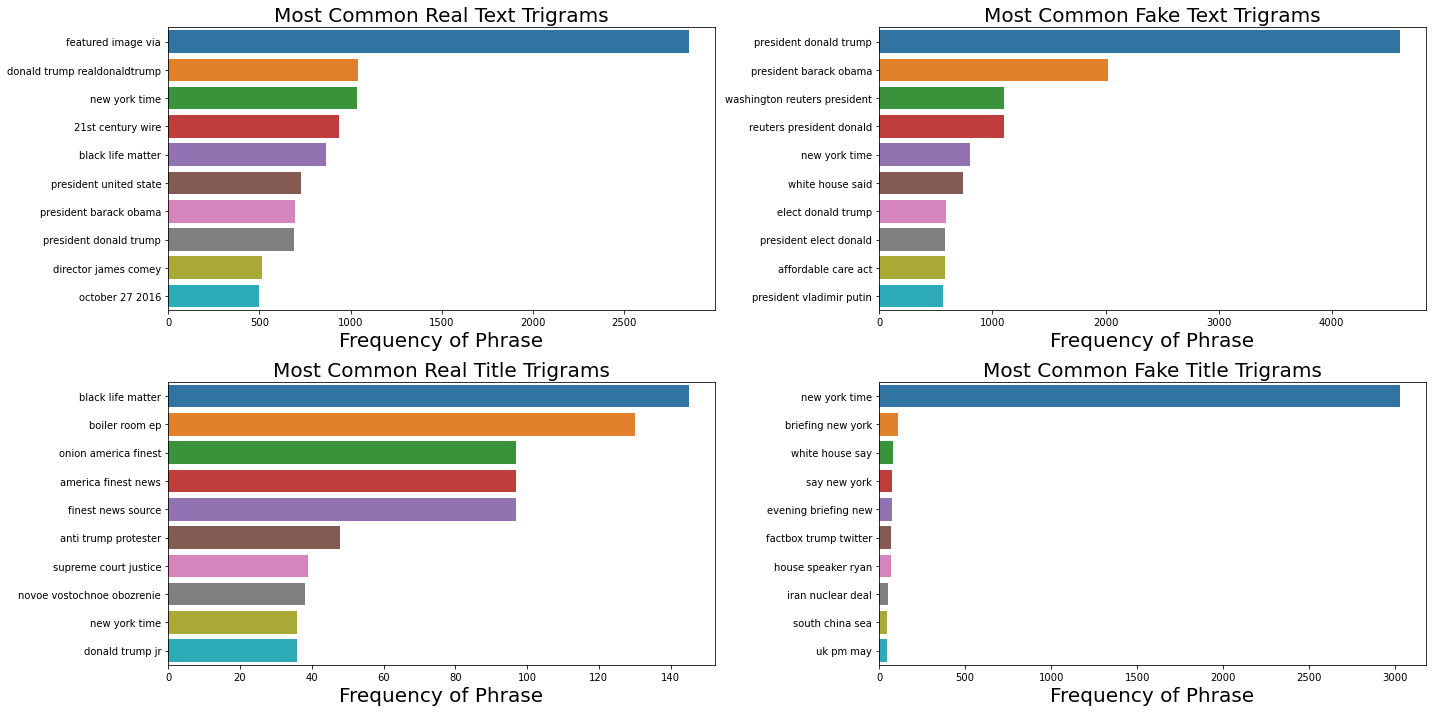

In [77]:
import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))
most_common_tri = get_top_text_ngrams(real_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()), ax = ax1)
ax1.set_xlabel('Frequency of Phrase', fontsize = 20)
ax1.set_title('Most Common Real Text Trigrams', fontsize = 20)

most_common_tri = get_top_text_ngrams(fake_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()), ax = ax2)
ax2.set_xlabel('Frequency of Phrase', fontsize = 20)
ax2.set_title('Most Common Fake Text Trigrams', fontsize = 20)

most_common_tri = get_top_text_ngrams(real_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()), ax = ax3)
ax3.set_xlabel('Frequency of Phrase', fontsize = 20)
ax3.set_title('Most Common Real Title Trigrams', fontsize = 20)

most_common_tri = get_top_text_ngrams(fake_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()), ax = ax4)
ax4.set_xlabel('Frequency of Phrase', fontsize = 20)
ax4.set_title('Most Common Fake Title Trigrams', fontsize = 20)

plt.tight_layout()

Real

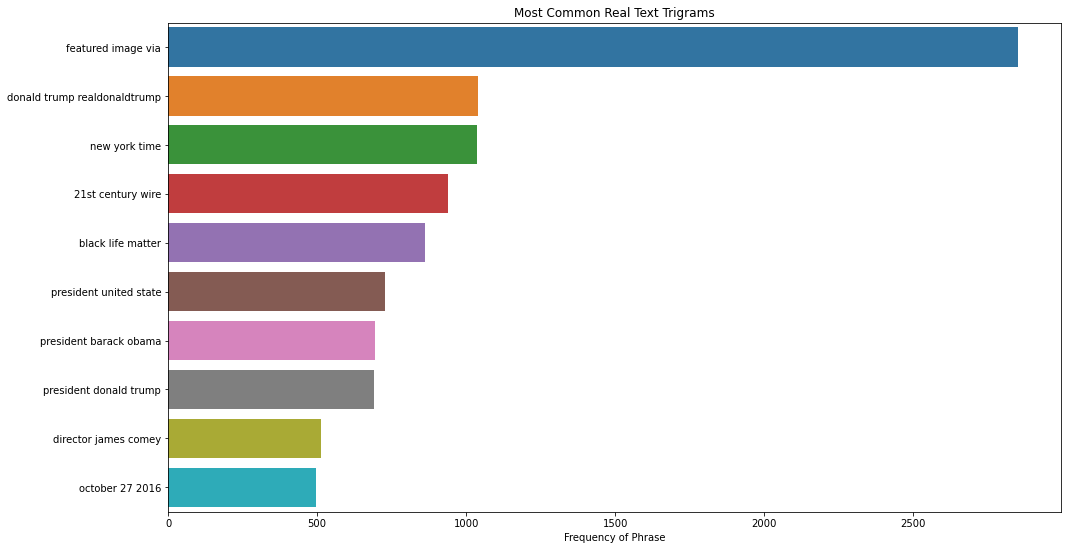

In [72]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(real_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Text Trigrams');

Fake

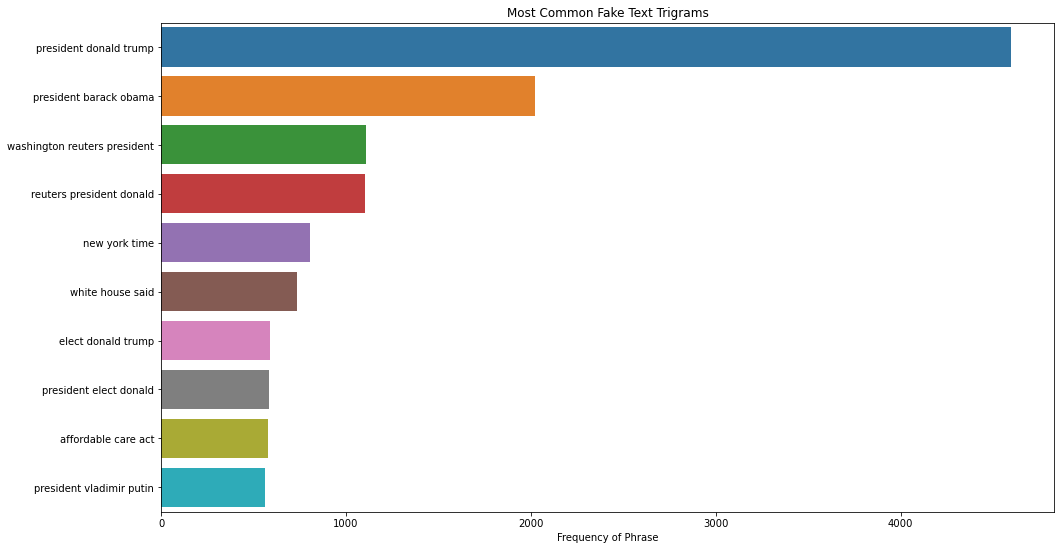

In [73]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(fake_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Text Trigrams');

Real Title

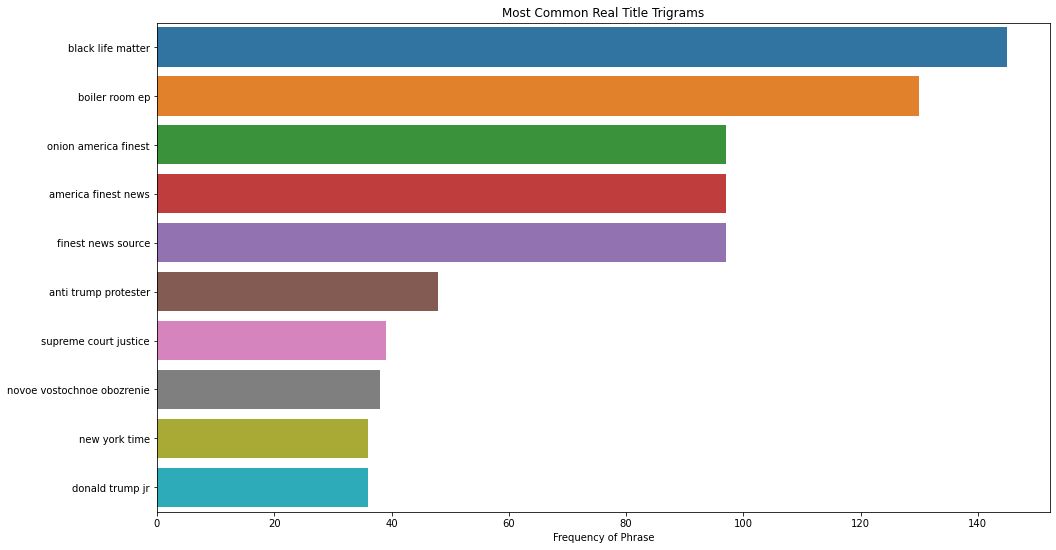

In [74]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(real_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Title Trigrams');

Fake Title

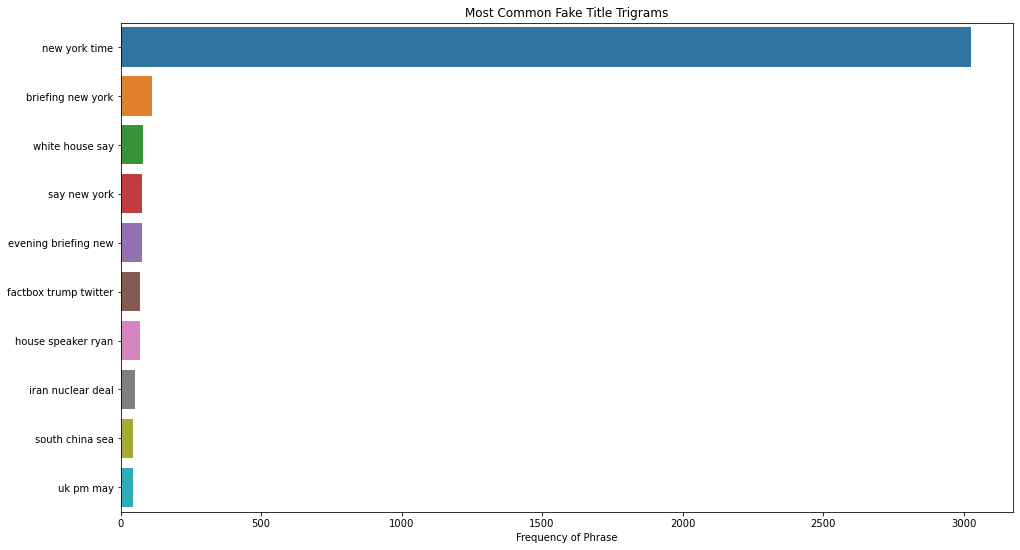

In [75]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(fake_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Title Trigrams');

The two diagrams of the bigrams and three diagrams of the diagrams show that there are differences between fake and real news. Hence, the Ngrams could be considered as a good feature.

### Compare F1

https://towardsdatascience.com/leveraging-n-grams-to-extract-context-from-text-bdc576b47049

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# establish input and output
X = list(new_df['text'])
y = list(new_df['label'])

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for N in range(1, 5):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word', ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.8692
F-1 score of model with n-gram range of (1, 2): 0.9134
F-1 score of model with n-gram range of (1, 3): 0.9226
F-1 score of model with n-gram range of (1, 4): 0.9245


The F1 scores stop increasing from the 3rd-grams. Hence, we will use bigram, and trigram in our dataset.

### Topic Modeling

In [78]:
import gensim
from gensim import corpora
import spacy
nlp = spacy.load('en_core_web_sm')

In [79]:
def topic_modeling(text):
    item_list = text.tolist()
    items = [text.split() for text in item_list]
    item_dict = corpora.Dictionary(items)
    item_matrix = [item_dict.doc2bow(i) for i in items]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(item_matrix, num_topics=20, id2word=item_dict, passes=10, random_state=0, iterations=50, eval_every=None)
    return ldamodel.show_topics(num_topics=20, formatted=False)

In [80]:
real_title_topics = topic_modeling(real_df['title'])
fake_title_topics = topic_modeling(fake_df['title'])
real_text_topics = topic_modeling(real_df['text'])
fake_text_topics = topic_modeling(fake_df['text'])

In [89]:
print(real_title_topics[0])

(0, [('election', 0.058982726), ('u', 0.032795563), ('trump', 0.024867807), ('death', 0.017867442), ('government', 0.016067475), ('could', 0.013826686), ('find', 0.0132057285), ('deal', 0.0130775925), ('nuclear', 0.012856162), ('post', 0.01194409)])


In [90]:
print(fake_title_topics[0])

(0, [('trump', 0.047631387), ('protest', 0.033751726), ('breitbart', 0.033710245), ('anti', 0.030930126), ('military', 0.02812252), ('head', 0.025947094), ('face', 0.01882938), ('speech', 0.018716872), ('despite', 0.017787362), ('protester', 0.016613372)])


In [91]:
print(real_text_topics[0])

(0, [('wire', 0.025204424), ('21st', 0.023568166), ('century', 0.02188263), ('21wire', 0.019726563), ('radio', 0.01667161), ('room', 0.016384866), ('pm', 0.014965687), ('boiler', 0.014825808), ('acr', 0.014569108), ('u', 0.012621896)])


In [92]:
print(fake_text_topics[0])

(0, [('farmer', 0.024686687), ('south', 0.022610761), ('brazil', 0.019202402), ('water', 0.019059604), ('sudan', 0.018858379), ('food', 0.017523134), ('kiir', 0.01600972), ('farc', 0.013451478), ('perdue', 0.012013582), ('farm', 0.012000467)])


### Most/Least Common Words

In [81]:
from collections import Counter
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
def ten_most_common(corpus):
    the_counter = Counter(corpus)
    the_most_common = the_counter.most_common(10)
    new_most_common = dict(the_most_common)
    return new_most_common
def ten_least_common(corpus):
    the_counter = Counter(corpus)
    least_common = the_counter.most_common()[-9:]
    new_least_common = dict(least_common)
    return new_least_common

In [82]:
real_corpus_text = get_corpus(real_df['text'])
real_corpus_title = get_corpus(real_df['title'])
fake_corpus_text = get_corpus(fake_df['text'])
fake_corpus_title = get_corpus(fake_df['title'])

In [83]:
most_common_real_text = ten_most_common(real_corpus_text)
most_common_real_title = ten_most_common(real_corpus_title)
most_common_fake_text = ten_most_common(fake_corpus_text)
most_common_fake_title = ten_most_common(fake_corpus_title)

least_common_real_text = ten_least_common(real_corpus_text)
least_common_real_title = ten_least_common(real_corpus_title)
least_common_fake_text = ten_least_common(fake_corpus_text)
least_common_fake_title = ten_least_common(fake_corpus_title)

### N-grams

N-grams are formed when several words are combined and used. The fundamental idea behind n-grams is that they represent the language structure, such as what letter or word is most likely to come after the one that is supplied. Here, we chose to employ bigrams (N=2) in our dataset. This will be an important feature in our machine learning model.

In [84]:
def ngrams(the_list, i):
    ngrams_list = []
    for item in the_list:
        ngrams_list.append(TextBlob(item).ngrams(i))
    return ngrams_list

In [85]:
new_df['title_bigrams'] = ngrams([str(x) for x in new_df['title']], 2)
new_df['title_trigrams'] = ngrams([str(x) for x in new_df['title']], 3)

C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/3143891061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_bigrams'] = ngrams([str(x) for x in new_df['title']], 2)
C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/3143891061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_trigrams'] = ngrams([str(x) for x in new_df['title']], 3)


In [86]:
new_df['text_bigrams'] = ngrams([str(x) for x in new_df['text']], 2)
new_df['text_trigrams'] = ngrams([str(x) for x in new_df['text']], 3)

C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/835723170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_bigrams'] = ngrams([str(x) for x in new_df['text']], 2)
C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/835723170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_trigrams'] = ngrams([str(x) for x in new_df['text']], 3)


In [87]:
new_df[['label', 'title', 'title_bigrams', 'title_trigrams', 'text_bigrams', 'text_trigrams']].head(5)

label                                              title  \
0      1  law enforcement high alert following threat co...   
2      1  unbelievable obama attorney general say charlo...   
4      1  satan 2 russia unvelis image terrifying new su...   
5      1  time christian group sue amazon splc designati...   
6      1  dr ben carson targeted irs never audit spoke n...   

                                       title_bigrams  \
0  [[law, enforcement], [enforcement, high], [hig...   
2  [[unbelievable, obama], [obama, attorney], [at...   
4  [[satan, 2], [2, russia], [russia, unvelis], [...   
5  [[time, christian], [christian, group], [group...   
6  [[dr, ben], [ben, carson], [carson, targeted],...   

                                      title_trigrams  \
0  [[law, enforcement, high], [enforcement, high,...   
2  [[unbelievable, obama, attorney], [obama, atto...   
4  [[satan, 2, russia], [2, russia, unvelis], [ru...   
5  [[time, christian, group], [christian, group, ...   
6  [[dr, ben, carson], [ben, carson, targeted], [...   

                                        text_bigrams  \
0  [[comment, expected], [expected, barack], [bar...   
2  [[demonstrator, gathered], [gathered, last], [...   
4  [[r, 28], [28, sarmat], [sarmat, missile], [mi...   
5  [[say, one], [one, time], [time, someone], [so...   
6  [[dr, ben], [ben, carson], [carson, tell], [te...   

                                       text_trigrams  
0  [[comment, expected, barack], [expected, barac...  
2  [[demonstrator, gathered, last], [gathered, la...  
4  [[r, 28, sarmat], [28, sarmat, missile], [sarm...  
5  [[say, one, time], [one, time, someone], [time...  
6  [[dr, ben, carson], [ben, carson, tell], [cars...

In [88]:
# Removing punctuation and stop words after n-grams
new_df['text']=new_df['text'].apply(remove_stopwords)
new_df['title']=new_df['title'].apply(remove_stopwords)

C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/423215947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text']=new_df['text'].apply(remove_stopwords)
C:\Users\sarah\AppData\Local\Temp/ipykernel_18312/423215947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title']=new_df['title'].apply(remove_stopwords)


### Correlations

In [89]:
new_df.corr()

label  title_polarity  title_subjectivity  \
label               1.000000       -0.054398            0.176158   
title_polarity     -0.054398        1.000000            0.016094   
title_subjectivity  0.176158        0.016094            1.000000   
text_polarity       0.003701        0.217696            0.028720   
text_subjectivity   0.211146        0.009284            0.222052   
word_count_title    0.229439       -0.019367            0.213348   
char_count_title    0.247932       -0.036907            0.196258   
avg_word_title      0.041281       -0.046338           -0.048654   
numerics_title      0.063045       -0.003350           -0.025348   
word_count_text    -0.056190        0.008888            0.009125   
char_count_text    -0.063715        0.008038            0.003878   
avg_word_text      -0.199631       -0.010415           -0.089232   
numerics_text      -0.017795        0.005443           -0.007168   

                    text_polarity  text_subjectivity  word_count_title  \
label                    0.003701           0.211146          0.229439   
title_polarity           0.217696           0.009284         -0.019367   
title_subjectivity       0.028720           0.222052          0.213348   
text_polarity            1.000000           0.163751         -0.043693   
text_subjectivity        0.163751           1.000000          0.078027   
word_count_title        -0.043693           0.078027          1.000000   
char_count_title        -0.048149           0.073393          0.926848   
avg_word_title          -0.012704          -0.008619         -0.171622   
numerics_title           0.000280          -0.019539          0.168302   
word_count_text         -0.013398           0.045284         -0.005922   
char_count_text         -0.016312           0.039620         -0.012092   
avg_word_text           -0.050562          -0.051550         -0.082482   
numerics_text           -0.002828          -0.005637         -0.015597   

                    char_count_title  avg_word_title  numerics_title  \
label                       0.247932        0.041281        0.063045   
title_polarity             -0.036907       -0.046338       -0.003350   
title_subjectivity          0.196258       -0.048654       -0.025348   
text_polarity              -0.048149       -0.012704        0.000280   
text_subjectivity           0.073393       -0.008619       -0.019539   
word_count_title            0.926848       -0.171622        0.168302   
char_count_title            1.000000        0.187226        0.060626   
avg_word_title              0.187226        1.000000       -0.249887   
numerics_title              0.060626       -0.249887        1.000000   
word_count_text            -0.018861       -0.017360        0.006643   
char_count_text            -0.018506        0.000527       -0.000267   
avg_word_text               0.009711        0.248139       -0.093437   
numerics_text              -0.035094       -0.040700        0.157411   

                    word_count_text  char_count_text  avg_word_text  \
label                     -0.056190        -0.063715      -0.199631   
title_polarity             0.008888         0.008038      -0.010415   
title_subjectivity         0.009125         0.003878      -0.089232   
text_polarity             -0.013398        -0.016312      -0.050562   
text_subjectivity          0.045284         0.039620      -0.051550   
word_count_title          -0.005922        -0.012092      -0.082482   
char_count_title          -0.018861        -0.018506       0.009711   
avg_word_title            -0.017360         0.000527       0.248139   
numerics_title             0.006643        -0.000267      -0.093437   
word_count_text            1.000000         0.996922       0.046588   
char_count_text            0.996922         1.000000       0.095996   
avg_word_text              0.046588         0.095996       1.000000   
numerics_text              0.547569         0.524769      -0.124074   

                    numerics_

## 3. **Models - 70/30**

### Trying Different Models

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix

In [91]:
# dependent and independent variable
x = new_df["text"]
y = new_df["label"]

In [92]:
# training and testing set from combined dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [93]:
models = []
acc = []
f1 = [] # also f1 score for testing data
f1Train = []

### Generate Words Representation

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer as cvect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tfvect

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [95]:
def get_representation(vectorizer, x_train, x_test, y_train, y_test):
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    return x_train, y_train, x_test, y_test
cv_rep = get_representation(CountVectorizer(), x_train, x_test, y_train, y_test)
tf_rep = get_representation(TfidfVectorizer(), x_train, x_test, y_train, y_test)

In [96]:
def classify(acc, f1, f1Train, method, cv_rep, tf_rep, tfid = False):
    x_train, y_train, x_test, y_test = tf_rep if tfid else cv_rep
    pipe = make_pipeline(StandardScaler(with_mean=False), method)
    pipe.fit(x_train, y_train)  
    pipe.score(x_test, y_test)  

    y_pred = pipe.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    f1Train.append(f1_score(y_train, pipe.predict(x_train)))
    print(classification_report(y_test, y_pred))

### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
print("Decision Tree Classifier with count representation...")
models.append("Decision Tree Classifier with Count Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, False)

Decision Tree Classifier with count representation...
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6934
           1       0.90      0.92      0.91      7583

    accuracy                           0.90     14517
   macro avg       0.90      0.90      0.90     14517
weighted avg       0.90      0.90      0.90     14517



In [99]:
print("Decision Tree Classifier with TF-IDF representation...")
models.append("Decision Tree Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, True)

Decision Tree Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6934
           1       0.89      0.91      0.90      7583

    accuracy                           0.90     14517
   macro avg       0.90      0.90      0.90     14517
weighted avg       0.90      0.90      0.90     14517



### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
print("Logistic Regression with count representation...")
models.append("Logistic Regression with Count Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, False)

Logistic Regression with count representation...
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      6934
           1       0.90      0.93      0.92      7583

    accuracy                           0.91     14517
   macro avg       0.91      0.91      0.91     14517
weighted avg       0.91      0.91      0.91     14517



In [102]:
print("Logistic Regression with TF-IDF representation...")
models.append("Logistic Regression with TF-IDF Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, True)

Logistic Regression with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6934
           1       0.91      0.93      0.92      7583

    accuracy                           0.92     14517
   macro avg       0.92      0.92      0.92     14517
weighted avg       0.92      0.92      0.92     14517



### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
print("Random Forest Classifier with count representation...")
models.append("Random Forest Classifier with Count Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, False)

Random Forest Classifier with count representation...
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6934
           1       0.90      0.95      0.93      7583

    accuracy                           0.92     14517
   macro avg       0.92      0.92      0.92     14517
weighted avg       0.92      0.92      0.92     14517



In [105]:
print("Random Forest Classifier with TF-IDF representation...")
models.append("Random Forest Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, True)

Random Forest Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      6934
           1       0.90      0.95      0.92      7583

    accuracy                           0.92     14517
   macro avg       0.92      0.92      0.92     14517
weighted avg       0.92      0.92      0.92     14517



### Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
print("Gradient Boosting Classifier with count representation...")
models.append("Gradient Boosting Classifier with Count Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, False)

Gradient Boosting Classifier with count representation...
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      6934
           1       0.87      0.97      0.92      7583

    accuracy                           0.91     14517
   macro avg       0.92      0.91      0.91     14517
weighted avg       0.91      0.91      0.91     14517



In [108]:
print("Gradient Boosting Classifier with TF-IDF representation...")
models.append("Gradient Boosting Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, True)

Gradient Boosting Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      6934
           1       0.88      0.96      0.92      7583

    accuracy                           0.91     14517
   macro avg       0.92      0.91      0.91     14517
weighted avg       0.91      0.91      0.91     14517



### Support-Vector Machines (SVM) Model

In [109]:
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

In [110]:
#parameters = {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10]}

In [111]:
#print("Support-Vector Machines (SVM) with count representation...")
#models.append("Support-Vector Machines (SVM) with Count Vectorizer")
#classify(acc, f1, f1Train, GridSearchCV(SVC(), parameters, n_jobs=-1), cv_rep, tf_rep, False)

In [112]:
#print("Support-Vector Machines (SVM) with TF-IDF representation...")
#models.append("Support-Vector Machines (SVM) with TF-IDF Vectorizer")
#classify(acc, f1, f1Train, GridSearchCV(SVC(), parameters, n_jobs=-1), cv_rep, tf_rep, True)

### Support-Vector Machines (SVM) Model NO GRID SEARCH

In [113]:
from sklearn.svm import SVC

In [114]:
print("Support-Vector Machines (SVM) with count representation...")
models.append("Support-Vector Machines (SVM) with Count Vectorizer")

vectorizer = CountVectorizer()
x_trainCount = vectorizer.fit_transform(x_train)
x_testCount = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainCount, y_train)

y_pred = SVM.predict(x_testCount)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainCount)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with count representation...
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6934
           1       0.91      0.94      0.93      7583

    accuracy                           0.92     14517
   macro avg       0.92      0.92      0.92     14517
weighted avg       0.92      0.92      0.92     14517



In [115]:
print("Support-Vector Machines (SVM) with TF-IDF representation...")
models.append("Support-Vector Machines (SVM) with TF-IDF Vectorizer")

vectorizer = TfidfVectorizer()
x_trainTfidf = vectorizer.fit_transform(x_train)
x_testTfidf = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainTfidf, y_train)

y_pred = SVM.predict(x_testTfidf)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainTfidf)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6934
           1       0.93      0.96      0.94      7583

    accuracy                           0.94     14517
   macro avg       0.94      0.94      0.94     14517
weighted avg       0.94      0.94      0.94     14517



### Multinomial Naive Bayes

In [116]:
from sklearn.naive_bayes import MultinomialNB 

In [117]:
print("Multinomial Naive Bayes with count representation...")
models.append("Multinomial Naive Bayes with Count Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, False)

Multinomial Naive Bayes with count representation...
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      6934
           1       0.89      0.80      0.84      7583

    accuracy                           0.84     14517
   macro avg       0.85      0.84      0.84     14517
weighted avg       0.85      0.84      0.84     14517



In [118]:
print("Multinomial Naive Bayes with TF-IDF representation...")
models.append("Multinomial Naive Bayes with TF-IDF Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, True)

Multinomial Naive Bayes with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      6934
           1       0.88      0.80      0.84      7583

    accuracy                           0.84     14517
   macro avg       0.84      0.84      0.84     14517
weighted avg       0.84      0.84      0.84     14517



### Neural Network

In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import gensim

In [120]:
# Converting X to format acceptable by gensim
X = []

for token in new_df["text_token"].values:
    X.append(token)

In [121]:
# Dimension of vectors we are generating
EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [122]:
w2v_model.save("word2vec.model")

In [123]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [124]:
word_index = tokenizer.word_index

In [125]:
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [126]:
vocab_size = len(tokenizer.word_index) + 1

In [127]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [128]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [129]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          13208500  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 13,325,877
Trainable params: 117,377
Non-trainable params: 13,208,500
_________________________________________________________________


In [130]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y)) 
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 6)

Epoch 1/6
794/794 [==============================] - 258s 323ms/step - loss: 0.2994 - acc: 0.8793 - val_loss: 0.3450 - val_acc: 0.8495
Epoch 2/6
794/794 [==============================] - 265s 333ms/step - loss: 0.2591 - acc: 0.8934 - val_loss: 0.2845 - val_acc: 0.8814
Epoch 3/6
794/794 [==============================] - 270s 341ms/step - loss: 0.2423 - acc: 0.8986 - val_loss: 0.2325 - val_acc: 0.9029
Epoch 4/6
794/794 [==============================] - 268s 338ms/step - loss: 0.1845 - acc: 0.9261 - val_loss: 0.1931 - val_acc: 0.9254
Epoch 5/6
794/794 [==============================] - 275s 346ms/step - loss: 0.1439 - acc: 0.9437 - val_loss: 0.1802 - val_acc: 0.9296
Epoch 6/6
794/794 [==============================] - 285s 360ms/step - loss: 0.1178 - acc: 0.9553 - val_loss: 0.1618 - val_acc: 0.9379


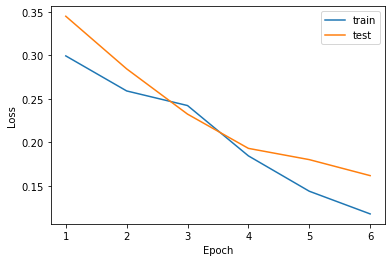

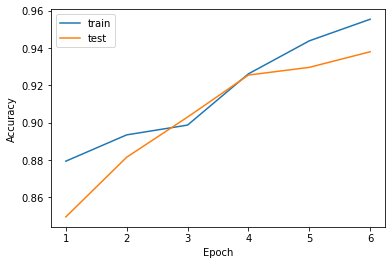

In [131]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)
plt.figure(1)
plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='test')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.figure(2)

plt.plot(epochs, accuracy, label='train')
plt.plot(epochs, val_accuracy, label='test')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [132]:
predict_NN = (model.predict(X_test) >= 0.5).astype("int")
print(classification_report(y_test, predict_NN))

379/379 [==============================] - 59s 156ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5839
           1       0.93      0.94      0.94      6259

    accuracy                           0.93     12098
   macro avg       0.93      0.93      0.93     12098
weighted avg       0.93      0.93      0.93     12098



In [133]:
models.append("Neural Network")
acc.append(accuracy_score(y_test, predict_NN))
f1.append(f1_score(y_test, predict_NN))
f1Train.append(f1_score(y_train, (model.predict(X_train) >= 0.5).astype("int")))

1135/1135 [==============================] - 167s 147ms/step


### Compare Models

In [134]:
# Compare 2 models
comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

Model  Accuracy  F1 Score
0      Decision Tree Classifier with Count Vectorizer  0.900875  0.906162
1     Decision Tree Classifier with TF-IDF Vectorizer  0.895777  0.901414
2           Logistic Regression with Count Vectorizer  0.909899  0.915164
3          Logistic Regression with TF-IDF Vectorizer  0.917407  0.921864
4      Random Forest Classifier with Count Vectorizer  0.922298  0.927516
5     Random Forest Classifier with TF-IDF Vectorizer  0.916994  0.922811
6   Gradient Boosting Classifier with Count Vector...  0.910037  0.918283
7   Gradient Boosting Classifier with TF-IDF Vecto...  0.909623  0.917629
8   Support-Vector Machines (SVM) with Count Vecto...  0.923469  0.927787
9   Support-Vector Machines (SVM) with TF-IDF Vect...  0.939106  0.942568
10      Multinomial Naive Bayes with Count Vectorizer  0.842874  0.841344
11     Multinomial Naive Bayes with TF-IDF Vectorizer  0.836674  0.835883
12                                     Neural Network  0.934287  0.936699

In [135]:
generalization = pd.DataFrame({'Model': models, 'F1 Score of Testing': f1, 'F1 Score of Training': f1Train})
generalization

Model  F1 Score of Testing  \
0      Decision Tree Classifier with Count Vectorizer             0.906162   
1     Decision Tree Classifier with TF-IDF Vectorizer             0.901414   
2           Logistic Regression with Count Vectorizer             0.915164   
3          Logistic Regression with TF-IDF Vectorizer             0.921864   
4      Random Forest Classifier with Count Vectorizer             0.927516   
5     Random Forest Classifier with TF-IDF Vectorizer             0.922811   
6   Gradient Boosting Classifier with Count Vector...             0.918283   
7   Gradient Boosting Classifier with TF-IDF Vecto...             0.917629   
8   Support-Vector Machines (SVM) with Count Vecto...             0.927787   
9   Support-Vector Machines (SVM) with TF-IDF Vect...             0.942568   
10      Multinomial Naive Bayes with Count Vectorizer             0.841344   
11     Multinomial Naive Bayes with TF-IDF Vectorizer             0.835883   
12                                     Neural Network             0.936699   

    F1 Score of Training  
0               0.999775  
1               0.999775  
2               0.999578  
3               0.999775  
4               0.999775  
5               0.999775  
6               0.919259  
7               0.922937  
8               0.999213  
9               0.978130  
10              0.956466  
11              0.968803  
12              0.963164

## 4. **Models - 80/20**

### Trying Different Models

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix

In [137]:
# dependent and independent variable
x = new_df["text"]
y = new_df["label"]

In [138]:
# training and testing set from combined dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [139]:
models = []
acc = []
f1 = [] # also f1 score for testing data
f1Train = []

### Generate Words Representation

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer as cvect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tfvect

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [141]:
def get_representation(vectorizer, x_train, x_test, y_train, y_test):
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    return x_train, y_train, x_test, y_test
cv_rep = get_representation(CountVectorizer(), x_train, x_test, y_train, y_test)
tf_rep = get_representation(TfidfVectorizer(), x_train, x_test, y_train, y_test)

In [142]:
def classify(acc, f1, f1Train, method, cv_rep, tf_rep, tfid = False):
    x_train, y_train, x_test, y_test = tf_rep if tfid else cv_rep
    pipe = make_pipeline(StandardScaler(with_mean=False), method)
    pipe.fit(x_train, y_train)  
    pipe.score(x_test, y_test)  

    y_pred = pipe.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    f1Train.append(f1_score(y_train, pipe.predict(x_train)))
    print(classification_report(y_test, y_pred))

### Decision Tree
https://scikit-learn.org/stable/modules/tree.html#

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
print("Decision Tree Classifier with count representation...")
models.append("Decision Tree Classifier with Count Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, False)

Decision Tree Classifier with count representation...
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4597
           1       0.90      0.92      0.91      5081

    accuracy                           0.91      9678
   macro avg       0.91      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



In [145]:
print("Decision Tree Classifier with TF-IDF representation...")
models.append("Decision Tree Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, True)

Decision Tree Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4597
           1       0.90      0.92      0.91      5081

    accuracy                           0.90      9678
   macro avg       0.90      0.90      0.90      9678
weighted avg       0.90      0.90      0.90      9678



### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
print("Logistic Regression with count representation...")
models.append("Logistic Regression with Count Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, False)

Logistic Regression with count representation...
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4597
           1       0.91      0.94      0.92      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.91      0.92      9678
weighted avg       0.92      0.92      0.92      9678



In [148]:
print("Logistic Regression with TF-IDF representation...")
models.append("Logistic Regression with TF-IDF Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, True)

Logistic Regression with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4597
           1       0.92      0.94      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



### Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
print("Random Forest Classifier with count representation...")
models.append("Random Forest Classifier with Count Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, False)

Random Forest Classifier with count representation...
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4597
           1       0.91      0.95      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



In [151]:
print("Random Forest Classifier with TF-IDF representation...")
models.append("Random Forest Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, True)

Random Forest Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4597
           1       0.90      0.95      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



### Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
print("Gradient Boosting Classifier with count representation...")
models.append("Gradient Boosting Classifier with Count Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, False)

Gradient Boosting Classifier with count representation...
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4597
           1       0.88      0.96      0.92      5081

    accuracy                           0.91      9678
   macro avg       0.92      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



In [154]:
print("Gradient Boosting Classifier with TF-IDF representation...")
models.append("Gradient Boosting Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, True)

Gradient Boosting Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      4597
           1       0.88      0.96      0.92      5081

    accuracy                           0.91      9678
   macro avg       0.91      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



### Support-Vector Machines (SVM) Model with Grid Search

In [155]:
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

In [156]:
#parameters = {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10]}

In [157]:
#print("Support-Vector Machines (SVM) with count representation...")
#models.append("Support-Vector Machines (SVM) with Count Vectorizer")
#classify(acc, f1, f1Train, GridSearchCV(SVC(), parameters, n_jobs=-1), cv_rep, tf_rep, False)

In [158]:
#print("Support-Vector Machines (SVM) with TF-IDF representation...")
#models.append("Support-Vector Machines (SVM) with TF-IDF Vectorizer")
#classify(acc, f1, f1Train, GridSearchCV(SVC(), parameters, n_jobs=-1), cv_rep, tf_rep, True)

### Support-Vector Machines (SVM) Model NO GRID SEARCH

In [159]:
from sklearn.svm import SVC

In [160]:
print("Support-Vector Machines (SVM) with count representation...")
models.append("Support-Vector Machines (SVM) with Count Vectorizer")

vectorizer = CountVectorizer()
x_trainCount = vectorizer.fit_transform(x_train)
x_testCount = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainCount, y_train)

y_pred = SVM.predict(x_testCount)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainCount)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with count representation...
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4597
           1       0.92      0.94      0.93      5081

    accuracy                           0.93      9678
   macro avg       0.93      0.93      0.93      9678
weighted avg       0.93      0.93      0.93      9678



In [161]:
print("Support-Vector Machines (SVM) with TF-IDF representation...")
models.append("Support-Vector Machines (SVM) with TF-IDF Vectorizer")

vectorizer = TfidfVectorizer()
x_trainTfidf = vectorizer.fit_transform(x_train)
x_testTfidf = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainTfidf, y_train)

y_pred = SVM.predict(x_testTfidf)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainTfidf)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4597
           1       0.93      0.96      0.94      5081

    accuracy                           0.94      9678
   macro avg       0.94      0.94      0.94      9678
weighted avg       0.94      0.94      0.94      9678



### Multinomial Naive Bayes

In [162]:
from sklearn.naive_bayes import MultinomialNB 

In [163]:
print("Multinomial Naive Bayes with count representation...")
models.append("Multinomial Naive Bayes with Count Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, False)

Multinomial Naive Bayes with count representation...
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4597
           1       0.90      0.80      0.85      5081

    accuracy                           0.85      9678
   macro avg       0.85      0.85      0.85      9678
weighted avg       0.85      0.85      0.85      9678



In [164]:
print("Multinomial Naive Bayes with TF-IDF representation...")
models.append("Multinomial Naive Bayes with TF-IDF Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, True)

Multinomial Naive Bayes with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4597
           1       0.89      0.80      0.84      5081

    accuracy                           0.84      9678
   macro avg       0.84      0.84      0.84      9678
weighted avg       0.85      0.84      0.84      9678



### Neural Network

In [165]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import gensim

In [166]:
# Converting X to format acceptable by gensim
X = []

for token in new_df["text_token"].values:
    X.append(token)

In [167]:
# Dimension of vectors we are generating
EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [168]:
w2v_model.save("word2vec.model")

In [169]:
tokenizer = Tokenizer(lower = False)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [170]:
word_index = tokenizer.word_index

In [171]:
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [172]:
vocab_size = len(tokenizer.word_index) + 1

In [173]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [174]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [175]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 100)          13208500  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,325,877
Trainable params: 117,377
Non-trainable params: 13,208,500
_________________________________________________________________


In [176]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y)) 
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 6)

Epoch 1/6
908/908 [==============================] - 294s 322ms/step - loss: 0.3085 - acc: 0.8683 - val_loss: 0.2020 - val_acc: 0.9189
Epoch 2/6
908/908 [==============================] - 291s 320ms/step - loss: 0.1840 - acc: 0.9260 - val_loss: 0.1469 - val_acc: 0.9439
Epoch 3/6
908/908 [==============================] - 290s 319ms/step - loss: 0.1320 - acc: 0.9472 - val_loss: 0.1266 - val_acc: 0.9529
Epoch 4/6
908/908 [==============================] - 289s 318ms/step - loss: 0.1054 - acc: 0.9590 - val_loss: 0.1168 - val_acc: 0.9570
Epoch 5/6
908/908 [==============================] - 289s 318ms/step - loss: 0.0941 - acc: 0.9642 - val_loss: 0.1359 - val_acc: 0.9474
Epoch 6/6
908/908 [==============================] - 290s 320ms/step - loss: 0.0745 - acc: 0.9727 - val_loss: 0.1131 - val_acc: 0.9589


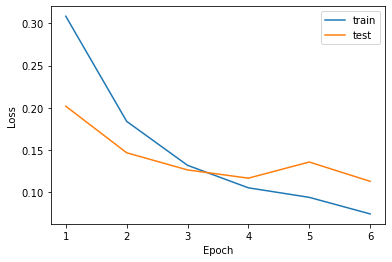

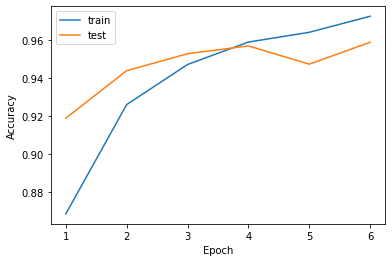

In [177]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(loss) + 1)
plt.figure(1)
plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='test')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.figure(2)

plt.plot(epochs, accuracy, label='train')
plt.plot(epochs, val_accuracy, label='test')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [178]:
predict_NN = (model.predict(X_test) >= 0.5).astype("int")
print(classification_report(y_test, predict_NN))

379/379 [==============================] - 49s 128ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5796
           1       0.95      0.97      0.96      6302

    accuracy                           0.96     12098
   macro avg       0.96      0.96      0.96     12098
weighted avg       0.96      0.96      0.96     12098



In [179]:
models.append("Neural Network")
acc.append(accuracy_score(y_test, predict_NN))
f1.append(f1_score(y_test, predict_NN))
f1Train.append(f1_score(y_train, (model.predict(X_train) >= 0.5).astype("int")))

1135/1135 [==============================] - 146s 129ms/step


### Compare Models

In [180]:
# Compare 2 models
comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

Model  Accuracy  F1 Score
0      Decision Tree Classifier with Count Vectorizer  0.907109  0.912642
1     Decision Tree Classifier with TF-IDF Vectorizer  0.900909  0.906630
2           Logistic Regression with Count Vectorizer  0.915478  0.920736
3          Logistic Regression with TF-IDF Vectorizer  0.923538  0.928016
4      Random Forest Classifier with Count Vectorizer  0.922401  0.927851
5     Random Forest Classifier with TF-IDF Vectorizer  0.919818  0.925912
6   Gradient Boosting Classifier with Count Vector...  0.910209  0.918564
7   Gradient Boosting Classifier with TF-IDF Vecto...  0.909382  0.917459
8   Support-Vector Machines (SVM) with Count Vecto...  0.927464  0.931619
9   Support-Vector Machines (SVM) with TF-IDF Vect...  0.941104  0.944553
10      Multinomial Naive Bayes with Count Vectorizer  0.847179  0.845438
11     Multinomial Naive Bayes with TF-IDF Vectorizer  0.841600  0.840661
12                                     Neural Network  0.959001  0.961086

In [181]:
generalization = pd.DataFrame({'Model': models, 'F1 Score of Testing': f1, 'F1 Score of Training': f1Train})
generalization

Model  F1 Score of Testing  \
0      Decision Tree Classifier with Count Vectorizer             0.912642   
1     Decision Tree Classifier with TF-IDF Vectorizer             0.906630   
2           Logistic Regression with Count Vectorizer             0.920736   
3          Logistic Regression with TF-IDF Vectorizer             0.928016   
4      Random Forest Classifier with Count Vectorizer             0.927851   
5     Random Forest Classifier with TF-IDF Vectorizer             0.925912   
6   Gradient Boosting Classifier with Count Vector...             0.918564   
7   Gradient Boosting Classifier with TF-IDF Vecto...             0.917459   
8   Support-Vector Machines (SVM) with Count Vecto...             0.931619   
9   Support-Vector Machines (SVM) with TF-IDF Vect...             0.944553   
10      Multinomial Naive Bayes with Count Vectorizer             0.845438   
11     Multinomial Naive Bayes with TF-IDF Vectorizer             0.840661   
12                                     Neural Network             0.961086   

    F1 Score of Training  
0               0.999729  
1               0.999729  
2               0.999605  
3               0.999729  
4               0.999729  
5               0.999729  
6               0.920581  
7               0.922517  
8               0.999064  
9               0.978411  
10              0.953580  
11              0.965236  
12              0.981054

In [182]:
f1

[0.9126421144689535,
 0.9066303183721158,
 0.9207364341085271,
 0.9280155642023346,
 0.9278508982611201,
 0.925911781554325,
 0.9185643332396214,
 0.9174588235294117,
 0.9316189362945646,
 0.9445525291828794,
 0.8454383948165952,
 0.8406610539444964,
 0.9610858308488937]

## Save dataframe

In [183]:
# new_df.to_csv(index = False)

In [184]:
# from google.colab import drive

# drive.mount('/content/drive')
# %cd /content/drive/My Drive/INFO 442/

# new_df = pd.read_csv('new_df.csv')
new_df.head()

title  \
0  law enforcement high alert following threat co...   
2  unbelievable obama attorney general say charlo...   
4  satan 2 russia unvelis image terrifying new su...   
5  time christian group sue amazon splc designati...   
6  dr ben carson targeted irs never audit spoke n...   

                                                text  label  \
0  comment expected barack obama member fyf911 fu...      1   
2  demonstrator gathered last night exercising co...      1   
4  r 28 sarmat missile dubbed satan 2 replace 18 ...      1   
5  say one time someone sued southern poverty law...      1   
6      dr ben carson tell story happened spoke obama      1   

                                         title_token  \
0  [law, enforcement, high, alert, following, thr...   
2  [unbelievable, obama, attorney, general, say, ...   
4  [satan, 2, russia, unvelis, image, terrifying,...   
5  [time, christian, group, sue, amazon, splc, de...   
6  [dr, ben, carson, targeted, irs, never, audit,...   

                                          text_token  title_polarity  \
0  [comment, expected, barack, obama, member, fyf...        0.053333   
2  [demonstrator, gathered, last, night, exercisi...        0.016667   
4  [r, 28, sarmat, missile, dubbed, satan, 2, rep...       -0.287879   
5  [say, one, time, someone, sued, southern, pove...       -0.400000   
6  [dr, ben, carson, tell, story, happened, spoke...        0.000000   

   title_subjectivity  text_polarity  text_subjectivity  word_count_title  \
0            0.213333       0.013333            0.30750                13   
2            0.666667       0.178571            0.36746                13   
4            0.484848       0.100000            0.80500                12   
5            0.450000      -0.094931            0.38894                 9   
6            0.000000       0.000000            0.00000                11   

   ...  avg_word_title  numerics_title  word_count_text  char_count_text  \
0  ...        6.307692               1              261             1598   
2  ...        6.846154               0               21              159   
4  ...        5.666667               1               55              324   
5  ...        5.666667               0              144             1074   
6  ...        5.454545               0                8               45   

   avg_word_text  numerics_text  \
0       5.126437              6   
2       6.619048              0   
4       4.909091             12   
5       6.465278              0   
6       4.750000              0   

                                       title_bigrams  \
0  [[law, enforcement], [enforcement, high], [hig...   
2  [[unbelievable, obama], [obama, attorney], [at...   
4  [[satan, 2], [2, russia], [russia, unvelis], [...   
5  [[time, christian], [christian, group], [group...   
6  [[dr, ben], [ben, carson], [carson, targeted],...   

                                      title_trigrams  \
0  [[law, enforcement, high], [enforcement, high,...   
2  [[unbelievable, obama, attorney], [obama, atto...   
4  [[satan, 2, russia], [2, russia, unvelis], [ru...   
5  [[time, christian, group], [christian, group, ...   
6  [[dr, ben, carson], [ben, carson, targeted], [...   

                                        text_bigrams  \
0  [[comment, expected], [expected, barack], [bar...   
2  [[demonstrator, gathered], [gathered, last], [...   
4  [[r, 28], [28, sarmat], [sarmat, missile], [mi...   
5  [[say, one], [one, time], [time, someone], [so...   
6  [[dr, ben], [ben, carson], [carson, tell], [te...   

                                       text_trigrams  
0  [[comment, expected, barack], [expected, barac...  
2  [[demonstrator, gathered, last], [gathered, la...  
4  [[r, 28, sarmat], [28, sarmat, missile], [sarm...  
5  [[say, one, time], [one, time, someone], [time...  
6  [[dr, ben, carson], [ben, carson, tell], [cars...  

[5 rows x 21 columns]